In [1]:
import openeo

In [2]:
import pandas as pd

import boto3
import configparser
import os
import urllib3

import folium
import geopandas as gpd

import tempfile



In [3]:
urllib3.disable_warnings()


In [4]:
# Python Standard Libraries
import os
import datetime as dt

# Data Manipulation Libraries
import numpy as np
import xarray as xr

# Visualization Libraries
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs


# Climate Data Store API for retrieving climate data
import cdsapi

In [67]:
data_24 = xr.open_dataset('/home/eouser/hackathon/data/era5/temperature_era5_predict.nc')
data_24

data = xr.open_dataset('/home/eouser/hackathon/data/era5/temperature_era5.nc')
data

<xarray.Dataset> Size: 32kB
Dimensions:     (valid_time: 84, latitude: 5, longitude: 9)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 672B 2017-01-01 ... 2023-12-01
  * latitude    (latitude) float64 40B 47.0 46.75 46.5 46.25 46.0
  * longitude   (longitude) float64 72B 12.0 12.25 12.5 ... 13.5 13.75 14.0
    expver      (valid_time) <U4 1kB ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 15kB ...
    lsm         (valid_time, latitude, longitude) float32 15kB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts

In [70]:
def get_mean_temp(month):
    month -= 1
    dat_month = data.t2m[[0+month, 12+month, 24+ month, 36+ month, 48+ month, 60+ month, 72+ month], :, :]
    #return dat_month
    return  dat_month.mean(axis = 0)

In [69]:
dat = data.t2m[6, :, :]
dat

<xarray.DataArray 't2m' (latitude: 5, longitude: 9)> Size: 180B
[45 values with dtype=float32]
Coordinates:
    number      int64 8B ...
    valid_time  datetime64[ns] 8B 2017-07-01
  * latitude    (latitude) float64 40B 47.0 46.75 46.5 46.25 46.0
  * longitude   (longitude) float64 72B 12.0 12.25 12.5 ... 13.5 13.75 14.0
    expver      <U4 16B ...
Attributes: (12/32)
    GRIB_paramId:                             167
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      45
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avgua
    ...                                       ...
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    long_name:                                2 metre temperature
    units:                                    K
    standard_name:                            unknown
    GRIB_surface:                             0.0

In [49]:
month = 6

In [71]:
jun_avg = get_mean_temp(month)
jun_avg

<xarray.DataArray 't2m' (latitude: 5, longitude: 9)> Size: 180B
array([[284.19498, 283.25943, 283.09732, 283.39557, 284.37408, 285.40897,
        286.20807, 287.1347 , 288.08392],
       [285.70474, 285.47064, 285.5189 , 286.0764 , 287.14615, 287.99518,
        288.51498, 289.12408, 290.0588 ],
       [285.7823 , 286.50748, 287.4974 , 288.57193, 289.72147, 290.12857,
        289.8713 , 289.9712 , 290.3914 ],
       [286.8169 , 288.77448, 290.4617 , 291.70697, 292.90814, 293.0139 ,
        292.0976 , 291.24854, 291.13776],
       [292.1093 , 293.59732, 294.97232, 295.46646, 296.4112 , 296.3942 ,
        295.12018, 293.2265 , 292.68045]], dtype=float32)
Coordinates:
    number     int64 8B ...
  * latitude   (latitude) float64 40B 47.0 46.75 46.5 46.25 46.0
  * longitude  (longitude) float64 72B 12.0 12.25 12.5 12.75 ... 13.5 13.75 14.0

In [73]:

jun_avg_24 = data_24.t2m[month-1, :, :]

jun_avg_24.values

array([[282.72534, 281.03003, 280.7605 , 281.62964, 283.40698, 284.83667,
        285.52612, 286.3152 , 287.14722],
       [284.43042, 284.02222, 283.989  , 284.91284, 286.21558, 287.27026,
        287.5398 , 288.07495, 288.99292],
       [284.29956, 285.2058 , 286.3015 , 287.42847, 288.56714, 288.95386,
        288.68823, 288.87964, 289.33276],
       [285.823  , 287.8152 , 289.5105 , 290.7644 , 291.65112, 291.65894,
        290.8816 , 290.09448, 289.9734 ],
       [291.34253, 292.5027 , 293.7976 , 294.24292, 294.80737, 294.69604,
        293.62183, 291.86597, 291.37573]], dtype=float32)

In [74]:
delta = jun_avg - jun_avg_24

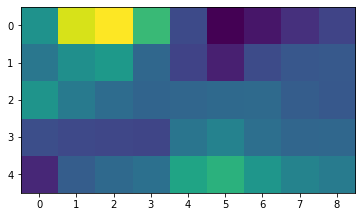

In [75]:
plt.imshow(delta, interpolation='none')
plt.show()

In [76]:
delta

<xarray.DataArray 't2m' (latitude: 5, longitude: 9)> Size: 180B
array([[1.469635  , 2.2294006 , 2.3368225 , 1.7659302 , 0.96710205,
        0.57229614, 0.6819458 , 0.81951904, 0.93670654],
       [1.2743225 , 1.4484253 , 1.5298767 , 1.1635437 , 0.9305725 ,
        0.72491455, 0.9751892 , 1.0491333 , 1.0658875 ],
       [1.482727  , 1.3016663 , 1.1958923 , 1.1434631 , 1.1543274 ,
        1.1747131 , 1.183075  , 1.0915527 , 1.0586243 ],
       [0.9938965 , 0.95928955, 0.9512024 , 0.9425659 , 1.257019  ,
        1.35495   , 1.2160034 , 1.1540527 , 1.1643677 ],
       [0.76678467, 1.094635  , 1.1747131 , 1.2235413 , 1.6038208 ,
        1.6981506 , 1.498352  , 1.3605347 , 1.304718  ]], dtype=float32)
Coordinates:
    number      int64 8B 0
  * latitude    (latitude) float64 40B 47.0 46.75 46.5 46.25 46.0
  * longitude   (longitude) float64 72B 12.0 12.25 12.5 ... 13.5 13.75 14.0
    valid_time  datetime64[ns] 8B 2024-06-01
    expver      <U4 16B ...